In [2]:
import os
import sys 
sys.path.append(os.path.abspath('..'))
import json
from pathlib import Path
from utils import create_directory
from model import test
import plot as plot
import numpy as np
import matplotlib.pyplot as plt
from utils import optimize_channel

In [16]:
data_dir = create_directory(directory_name='finetune12')

0.03086416534798182


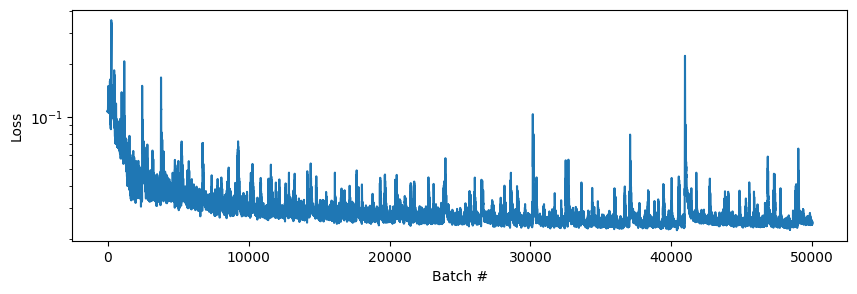

In [32]:
model_num = 21
model_name = "model{:02d}".format(model_num)

phase = 'growing_up'
log_file = list(Path(data_dir).glob(f'{model_name}_phase={phase}_*_log.json'))[0]
log = json.load(open(log_file,'r'))
fig,ax = plot.plot_training_log(log,'position',w=1)

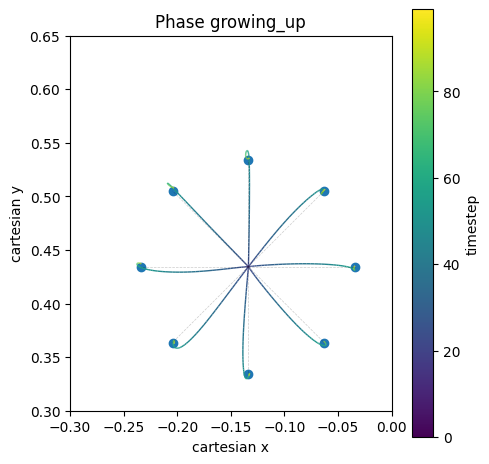

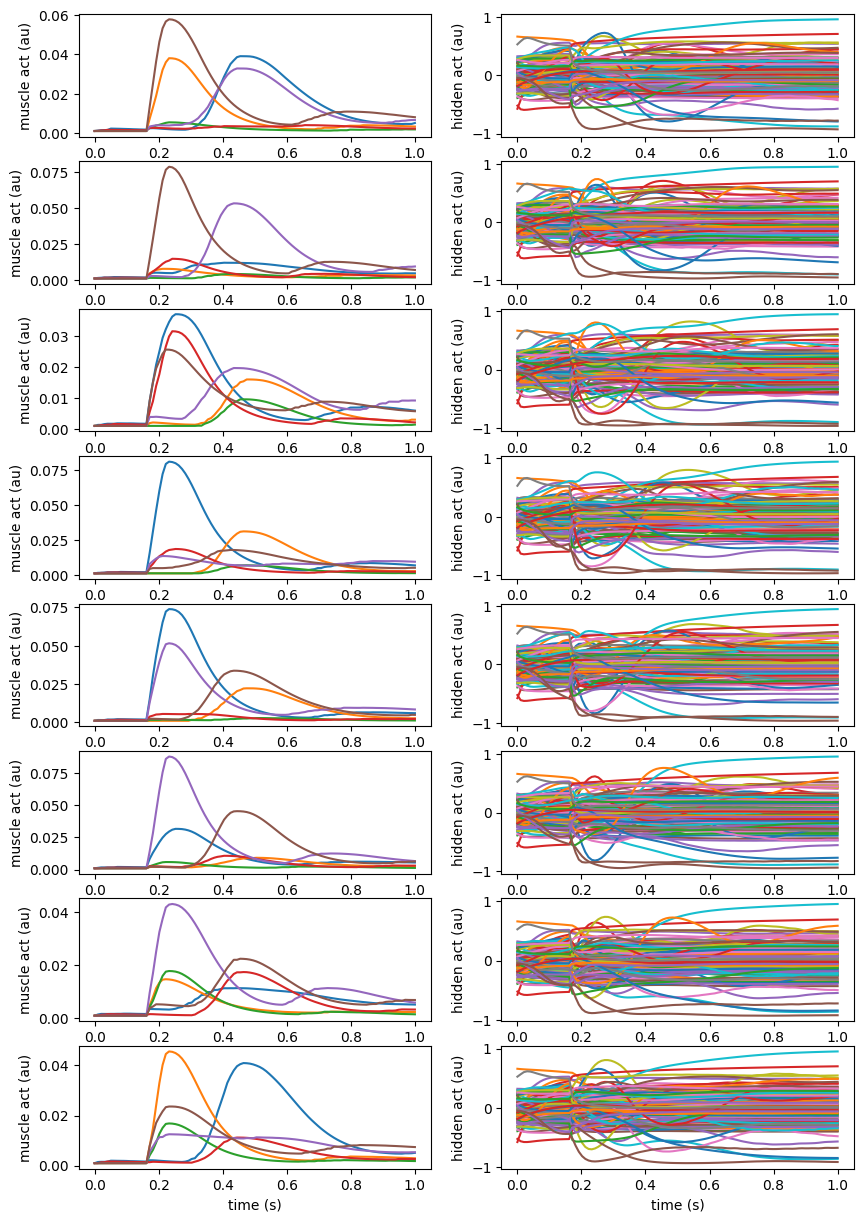

In [39]:
model_num = 10
# 7,8
model_name = "model{:02d}".format(model_num)


data=[]
#label = ['growing_up','NF1']
label = ['growing_up']
ff = [0,0]
is_channel = False
#K = 870
#B = -5
K = 170
B = -1
dT = 0.01

fig,ax = plt.subplots(1,len(label),figsize=(5*len(label),5))
for i,p in enumerate(label):
    weight_file = list(Path(data_dir).glob(f'{model_name}_phase={p}_*_weights'))[0]
    cfg_file = list(Path(data_dir).glob(f'{model_name}_phase={p}_*_cfg.json'))[0]
    data.append(test(cfg_file,weight_file,ff_coefficient=ff[i],is_channel=is_channel,K=K,B=B,dT=dT))
    #plot.plot_simulations(ax[i],xy=data[i]['xy'],target_xy=data[i]['tg'],vel=None,plot_lat=False)
    #ax[i].set_title(f'Phase {p}')
    plot.plot_simulations(ax,xy=data[i]['xy'],target_xy=data[i]['tg'],vel=None,plot_lat=False)
    ax.set_title(f'Phase {p}')

plt.tight_layout()
plt.show()

fig, ax = plot.plot_activation(data[i]['all_hidden'],data[i]['all_muscle'],figsize=(10,15))


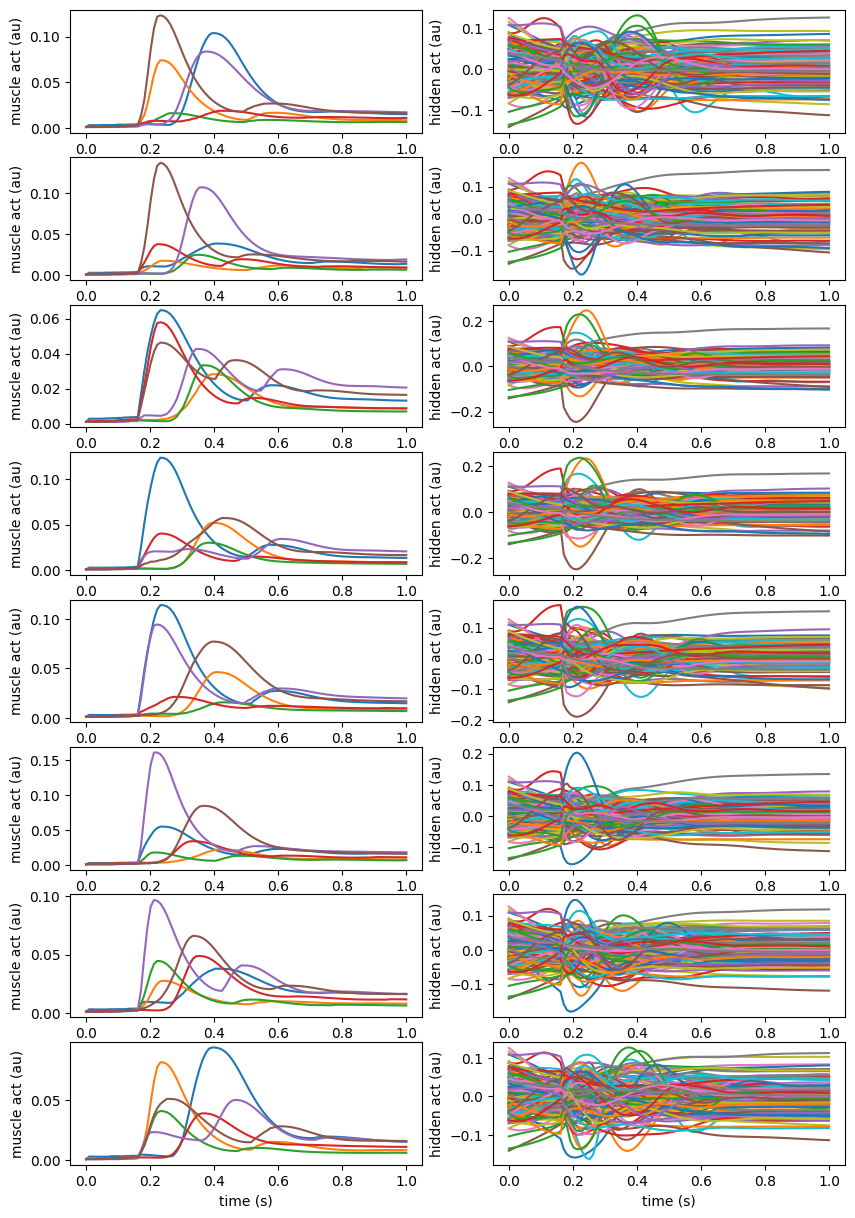

In [6]:
i = 0
fig, ax = plot.plot_activation(data[i]['all_hidden'],data[i]['all_muscle'],figsize=(10,15))

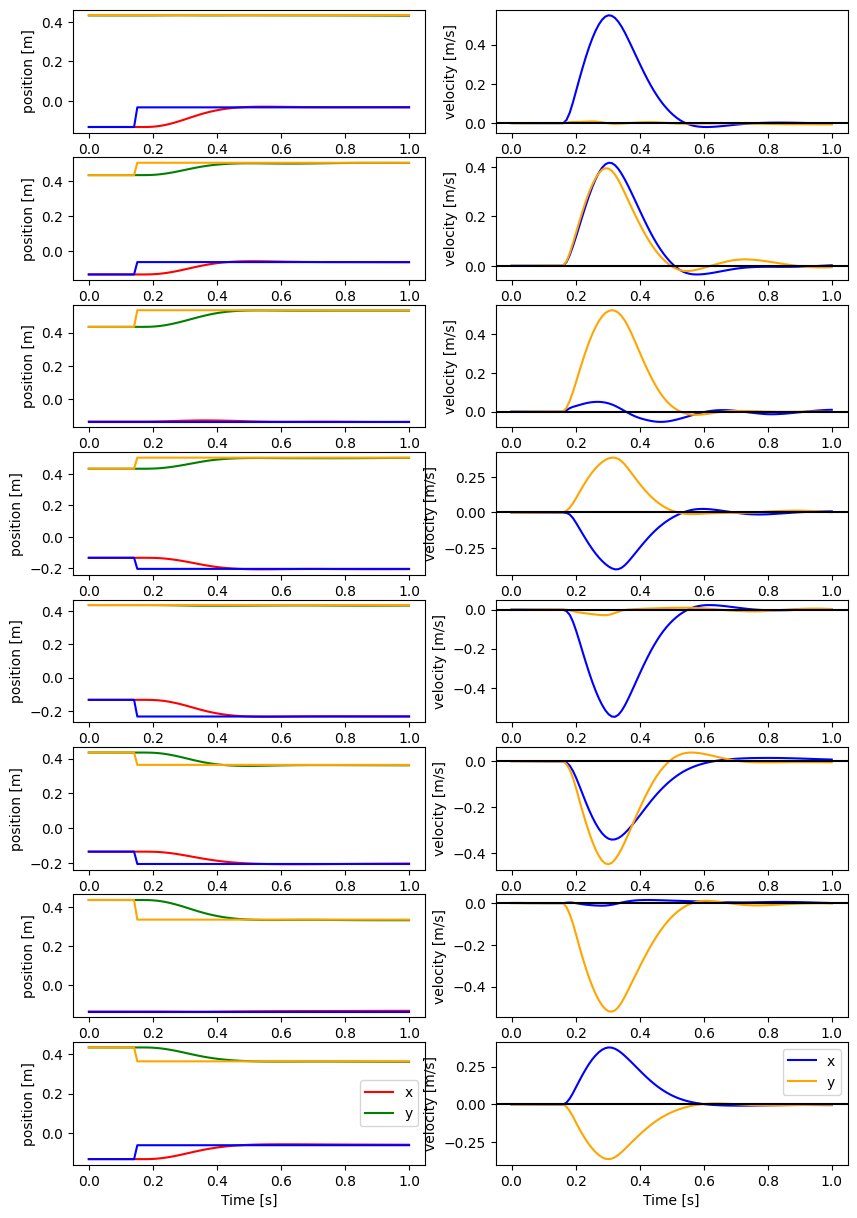

In [26]:
i = 0
fig, ax = plot.plot_kinematic(data[i]['vel'],data[i]['xy'],data[i]['tg'],figsize=(10,15))

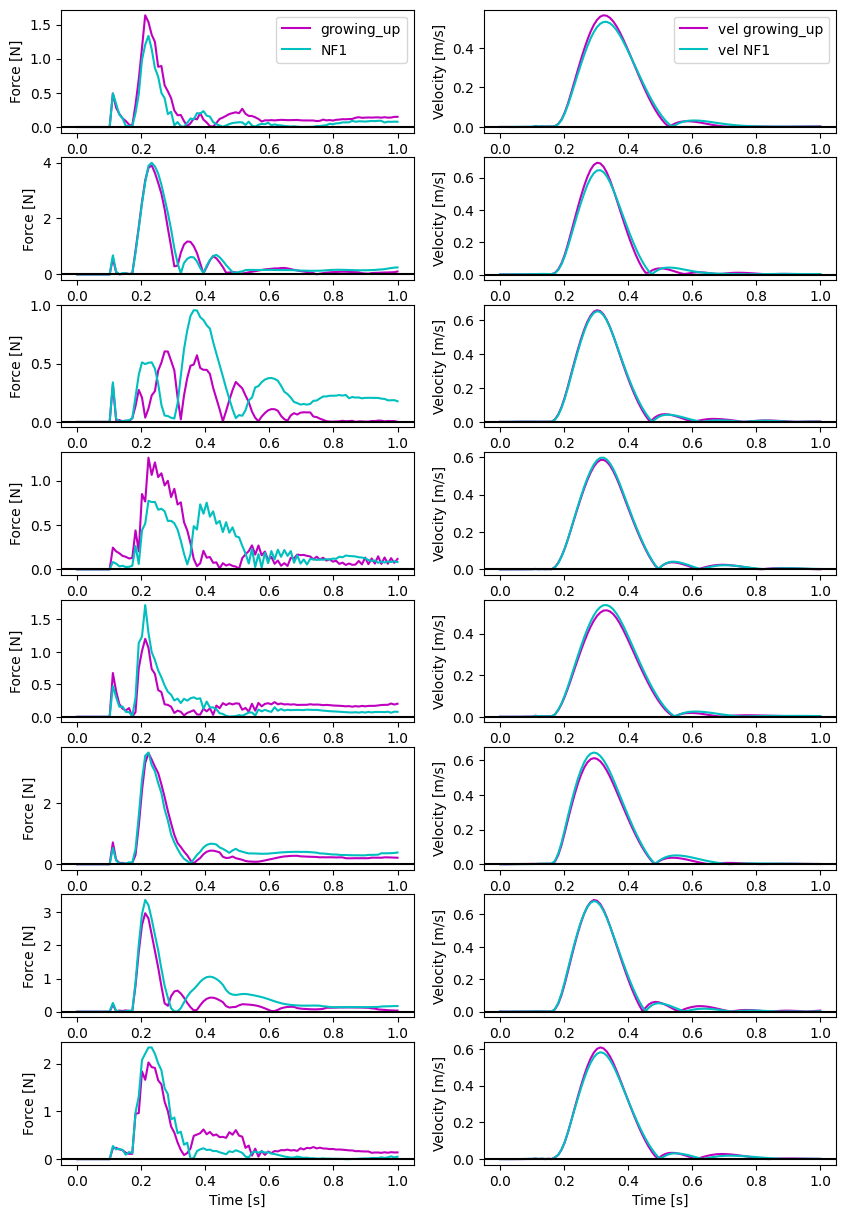

In [6]:
fig, ax = plot.plot_force(data,label,figsize=(10,15))